## Fundamentos de Data Science
Tu tarea es limpiar y explorar un dataset que contiene información sobre los salarios en el campo de la ciencia de datos para el año 2023. Este análisis es crucial para entender las tendencias salariales y los factores que influyen en las diferencias de salarios en esta industria.

### 1- Limpieza de datos con Python:
    - Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
    - Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
    - Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’).
    - Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
    - Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# FUNCIONES
# Función para detectar valores anómalos en salario usando desviaciones estándar
def detectar_anomalias_por_experiencia_y_cargo(df, columna_revision, columna_filtro_1, columna_filtro_2, criterio=5):
    # Calculamos la media y desviación estándar para cada nivel de experiencia
    stats = df.groupby([columna_filtro_1, columna_filtro_2])[columna_revision].agg(['mean', 'std', 'median'])
    # Crear una copia del DataFrame para evitar modificar el original directamente
    df_copy = df.copy()
    # Función que detecta si un valor es anómalo (más allá del criterio de desviaciones estándar)
    def is_anomalous(row):
        key = (row[columna_filtro_1], row[columna_filtro_2])
        if key in stats.index:
            mean = stats.loc[key, 'mean']
            std = stats.loc[key, 'std']
            median = stats.loc[key, 'median']
            df_copy.at[row.name, f'{columna_revision}_median'] = round(median)
            if pd.isna(std):  # Si std es NaN, no marcarlo como anómalo
                return False
            return np.abs(row[columna_revision] - mean) > criterio * std
        return False
    # Aplicar la función para detectar anomalías
    df_copy[f'{columna_revision}_is_anomalous'] = df_copy.apply(is_anomalous, axis=1)
    return df_copy

# Correccion de datos anomalos. Donde la columna salary_in_usd_is_anomalous, reemplazar el valor de salary por salary_in_usd_median
def reemplazar_valores_anomalos(df, valor_viejo_columna, boolean_column, valor_nuevo_columna):
    # Reemplazar el valor de valor_viejo_columna por el valor de valor_nuevo_columna si boolean_column es True
    df[valor_viejo_columna] = np.where(df[boolean_column], df[valor_nuevo_columna], df[valor_viejo_columna])
    return df

# Cargar datos desde un archivo CSV
df = pd.read_csv('../data/ds_salaries.csv')
# print("Primeras filas del DataFrame:")
# print(df.head(10))

# Manejo de datos faltantes en Columnas que son String
string_columnas = ['employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
df[string_columnas] = df[string_columnas].fillna('Desconocido')

# Manejo de datos faltantes en columnas que son numericas, por la mediana de la categoria
df['salary_in_usd'] = df.groupby(['experience_level', 'job_title'])['salary_in_usd'].transform(lambda x: x.fillna(x.median()))

# Detectar anomalías en la columna de salario y salario en dolares siempre teniendo en cuenta experience_level y job_title
df_revisado = detectar_anomalias_por_experiencia_y_cargo(df, 'salary_in_usd', 'experience_level', 'job_title')

# Mostrar las filas con salarios anómalos
salarios_anomalos = df_revisado[df_revisado['salary_in_usd_is_anomalous']]
print(salarios_anomalos)

# Llamada a la función para reemplazar los valores anómalos
df_limpio = reemplazar_valores_anomalos(df_revisado, 'salary_in_usd', 'salary_in_usd_is_anomalous', 'salary_in_usd_median')
salarios_limpios = df_limpio[df_limpio['salary_in_usd_is_anomalous']]
print(salarios_limpios)

# Guardar en csv para tener registro físico de los datos
df_limpio.to_csv('../data/ds_salaries_limpio.csv', index=False)


      work_year experience_level employment_type     job_title  salary  \
1288       2023               SE              FT  Data Analyst  385000   
2011       2022               MI              FT  Data Analyst  350000   

     salary_currency  salary_in_usd employee_residence  remote_ratio  \
1288             USD         385000                 US             0   
2011             GBP         430967                 GB             0   

     company_location company_size  salary_in_usd_median  \
1288               US            M              115467.0   
2011               GB            M              100000.0   

      salary_in_usd_is_anomalous  
1288                        True  
2011                        True  
      work_year experience_level employment_type     job_title  salary  \
1288       2023               SE              FT  Data Analyst  385000   
2011       2022               MI              FT  Data Analyst  350000   

     salary_currency  salary_in_usd employee_reside

### 2- Exploración de datos con Python:
    - Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
    - Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

Resumen estadístico:


C:\Users\asosa\AppData\Local\Temp\ipykernel_17212\3855526311.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrar_datos_linea['experience_level'] = pd.Categorical(filtrar_datos_linea['experience_level'], categories=orden_experiencia, ordered=True)
C:\Users\asosa\AppData\Local\Temp\ipykernel_17212\3855526311.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_title_experience_means = filtrar_datos_linea.groupby(['experience_level', 'job_title'])['salary_in_usd'].mean().reset_index()


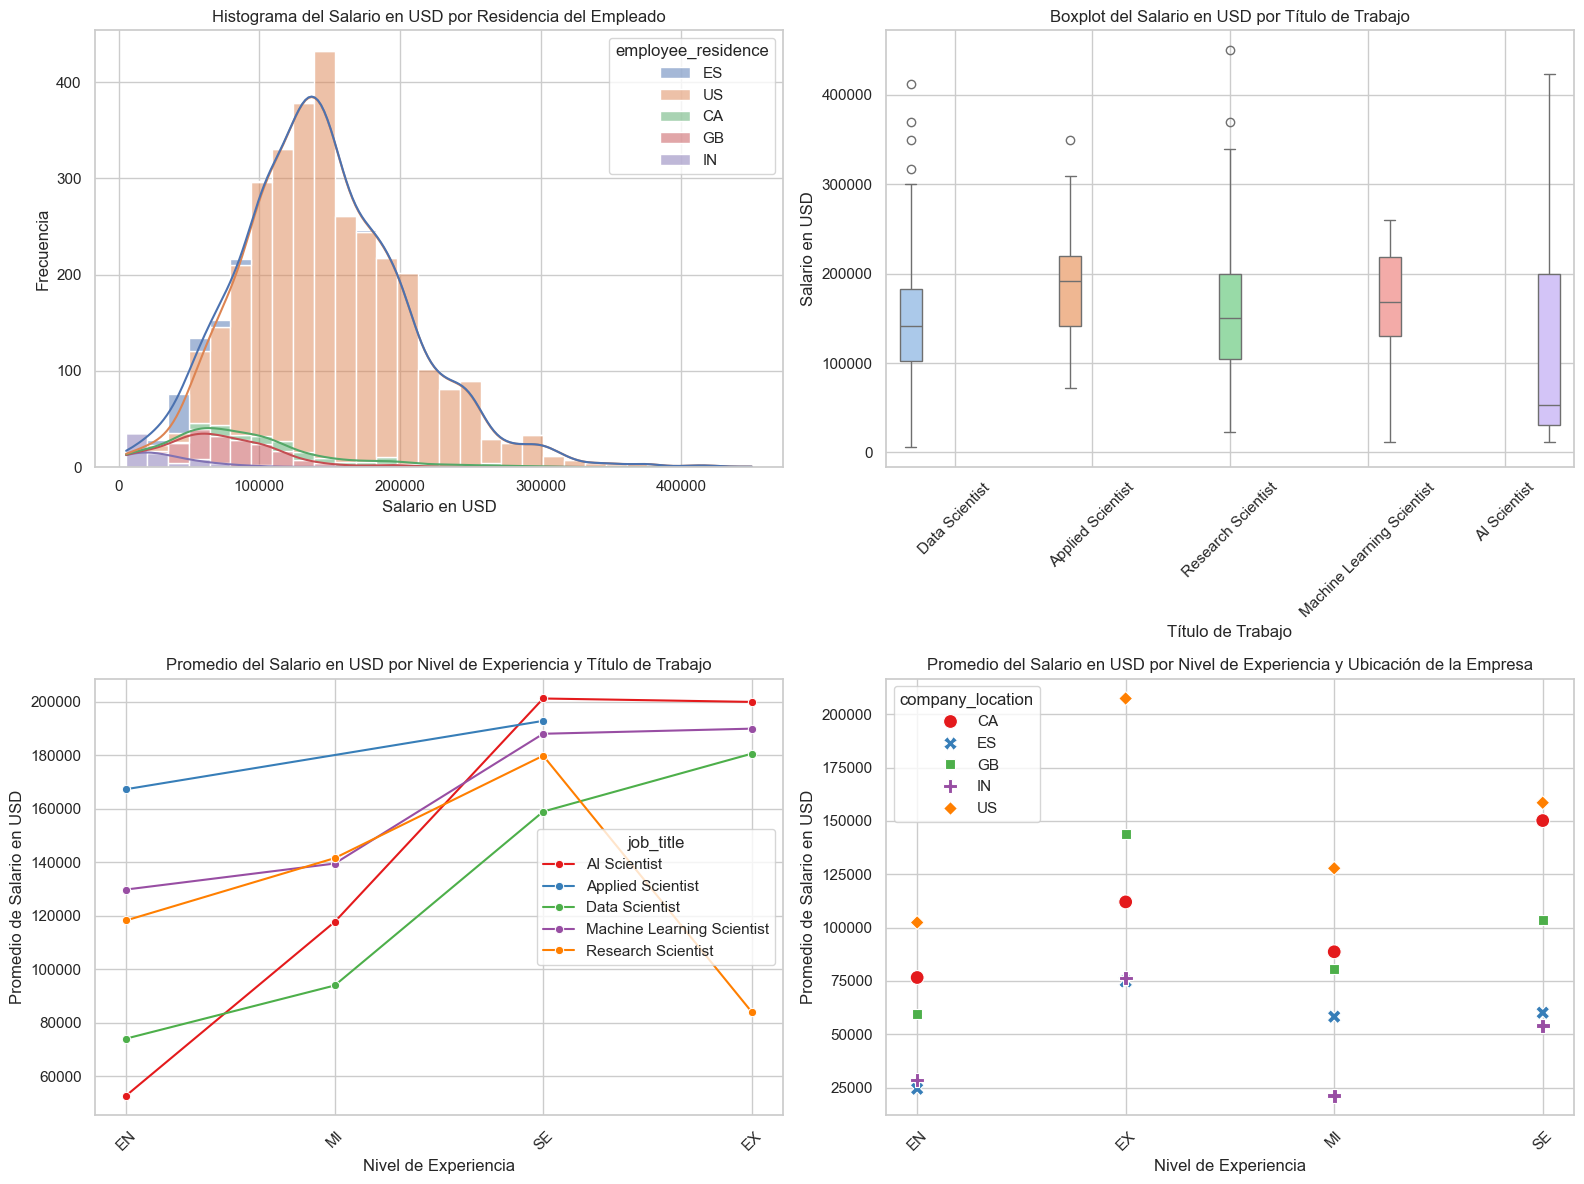

In [2]:
# Estadísticas descriptivas para variables numéricas
print("Resumen estadístico:")
# print(df_limpio.describe())

# Establecer el estilo de Seaborn
sns.set(style='whitegrid')

# Crear la figura y la cuadrícula de subgráficos
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histograma personalizado por employee_residence y company_location
filtrar_datos_histogramas = df_limpio[df_limpio['employee_residence'].isin(['US', 'ES', 'CA', 'GB', 'IN'])]
plt.subplot(2, 2, 1)
sns.histplot(data=filtrar_datos_histogramas, x='salary_in_usd', hue='employee_residence', multiple='stack', bins=30, kde=True)
plt.title('Histograma del Salario en USD por Residencia del Empleado')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.grid(True)

# 2. Boxplot agrupado por job_title
filtrar_datos_boxplots = df_limpio[df_limpio['job_title'].isin(['Applied Scientist', 'Research Scientist', 'Data Scientist', 'Machine Learning Scientist', 'AI Scientist'])]
plt.subplot(2, 2, 2)
sns.boxplot(data=filtrar_datos_boxplots, x='job_title', y='salary_in_usd', hue='job_title', palette='pastel', dodge=True)
plt.title('Boxplot del Salario en USD por Título de Trabajo')
plt.xlabel('Título de Trabajo')
plt.ylabel('Salario en USD')
plt.xticks(rotation=45)
plt.grid(True)

# 3. Gráfico de línea multivariable de promedios de salary_in_usd por experience_level y job_title
filtrar_datos_linea = df_limpio[df_limpio['job_title'].isin(['Applied Scientist', 'Research Scientist', 'Data Scientist', 'Machine Learning Scientist', 'AI Scientist'])]
orden_experiencia = ['EN', 'MI', 'SE', 'EX']
filtrar_datos_linea['experience_level'] = pd.Categorical(filtrar_datos_linea['experience_level'], categories=orden_experiencia, ordered=True)
plt.subplot(2, 2, 3)
job_title_experience_means = filtrar_datos_linea.groupby(['experience_level', 'job_title'])['salary_in_usd'].mean().reset_index()
sns.lineplot(data=job_title_experience_means, x='experience_level', y='salary_in_usd', hue='job_title', marker='o', palette='Set1')
plt.title('Promedio del Salario en USD por Nivel de Experiencia y Título de Trabajo')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Promedio de Salario en USD')
plt.xticks(rotation=45)
plt.grid(True)


# 4. Gráfico de dispersión multivariable de promedios de salary_in_usd por experience_level y company_location
filtrar_datos_scatter = df_limpio[df_limpio['company_location'].isin(['US', 'ES', 'CA', 'GB', 'IN'])]
plt.subplot(2, 2, 4)
company_location_means = filtrar_datos_scatter.groupby(['experience_level', 'company_location'])['salary_in_usd'].mean().reset_index()
sns.scatterplot(data=company_location_means, x='experience_level', y='salary_in_usd', hue='company_location', style='company_location', s=100, palette='Set1')
plt.title('Promedio del Salario en USD por Nivel de Experiencia y Ubicación de la Empresa')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Promedio de Salario en USD')
plt.xticks(rotation=45)
plt.grid(True)

# Ajustar el layout
plt.tight_layout()
plt.show()

### 3- Análisis adicional:
    - Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
    - Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

In [3]:
# Análisis Adicional
print("Medidas de tendencia central y dispersipón de las variables numéricas: ")
print(df_limpio.describe())
print("####################################", end="\n")

# Analisis de sueldos pagados por nivel de experiencia de cada Cargo
sueldo_promedio_por_cargo_experiencia = df_limpio.pivot_table(
    index='job_title',
    columns='experience_level',
    values='salary_in_usd',
    aggfunc='mean'
).reset_index()
# Renombrar las columnas para mayor claridad
sueldo_promedio_por_cargo_experiencia.columns.name = None  # Eliminar el nombre de las columnas
sueldo_promedio_por_cargo_experiencia.columns = [
    'job_title',
    'salary_EN',
    'salary_MI',
    'salary_SE',
    'salary_EX'
]
# Mostrar el nuevo DataFrame
sueldo_promedio_por_cargo_experiencia.fillna(0, inplace=True)
print(sueldo_promedio_por_cargo_experiencia.head(10))
print("####################################", end="\n")

# Analisis de sueldos pagados por nivel de experiencia de cada pais donde recide la empresa
sueldo_promedio_por_ubicacion_empresa_experiencia = df_limpio.pivot_table(
    index='company_location',
    columns='experience_level',
    values='salary_in_usd',
    aggfunc='mean'
).reset_index()
# Renombrar las columnas para mayor claridad
sueldo_promedio_por_ubicacion_empresa_experiencia.columns.name = None  # Eliminar el nombre de las columnas
sueldo_promedio_por_ubicacion_empresa_experiencia.columns = [
    'company_location',
    'salary_EN',
    'salary_MI',
    'salary_SE',
    'salary_EX'
]
# Mostrar el nuevo DataFrame
sueldo_promedio_por_ubicacion_empresa_experiencia.fillna(0, inplace=True)
print(sueldo_promedio_por_ubicacion_empresa_experiencia.head(10))
print("####################################", end="\n")


Medidas de tendencia central y dispersipón de las variables numéricas: 
         work_year        salary  salary_in_usd  remote_ratio  \
count  3755.000000  3.755000e+03    3755.000000   3755.000000   
mean   2022.373635  1.906956e+05  137410.469774     46.271638   
std       0.691448  6.716765e+05   62747.537874     48.589050   
min    2020.000000  6.000000e+03    5132.000000      0.000000   
25%    2022.000000  1.000000e+05   95000.000000      0.000000   
50%    2022.000000  1.380000e+05  135000.000000      0.000000   
75%    2023.000000  1.800000e+05  175000.000000    100.000000   
max    2023.000000  3.040000e+07  450000.000000    100.000000   

       salary_in_usd_median  
count           3755.000000  
mean          132727.509188  
std            36864.597474  
min             5409.000000  
25%           100000.000000  
50%           146058.000000  
75%           155500.000000  
max           416000.000000  
####################################
                            job_tit

## IDENTIFICACIONES DE TENDENCIAS
### A partir de las visualizaciones y el análisis estadístico podemos concluir los sgtes. puntos:
- El sueldo (pagado en dolares) guarda relación directa con el nivel de experiencia de la persona, pero es influida por la ubicación de la empresa y donde reside esa persona.
- El país que más paga por el mismo nivel de experiencia y el cargo es Estados Unidos, seguido por algunos paises Europeos. Los paises establecidos en países menos desarrollados, pagan menos por el mismo cargo y experiencia.
- Los niveles de experiencia más alto, tienen los sueldos más elevados.
- No se observan patrones significativos en la relación de trabajo remoto y salarial. Por lo que podemos asumir que las empresas no hacen una diferencia en el monto del sueldo si el trabajador trabaja remoto o no, pero si considera el nivel de experiencia.
- La diferencia de sueldos de los cargos o títulos de los trabajos, con la misma experiencia, es muy variable, por lo que asumimos que el cargo o título del trabajo no tiene ninguna relación con el salario pagado.
